# Куда девать кота

---

Эта тетрадка научит тебя использовать pandas, numpy, строить графики в matplotlib и обращаться с животными.

![img](http://i2.kym-cdn.com/photos/images/original/000/470/697/b6e.jpg)

Начнём!


* Клетки можно просто выполнять (выделить и ctrl+enter или shift+enter - чтобы сразу выделить следующую)
* По надобности их можно создавать ("плюсик" в панели наверху)
* В некоторых клетках нужно дописать код, что именно - пишется в комментариях рядом

## загрузим данные c Pandas

In [0]:
# подключим модуль Pandas. Он нужен, чтобы работать с данными
import pandas

# считаем данные
data = pandas.read_csv('train1.csv')

In [6]:
# Данные - таблица, двумерный массив
data[:10]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


## Расшифровка колонок
* Name - Имя(строка)
* DateTime - Время
* OutcomeType - Исход
 * Return_to_owner - Возврат владельцу
 * Adoption - Новый хозяин
 * Transfer - Перевод
 * Euthanasia - Эвтаназия (умерщвление)
 * Died - Смерть
* OutcomeSubtype - Подтип исхода
* AnimalType - Вид животного
* SexuponOutcome - Пол + стерилизация
* AgeuponOutcome - Возраст (строка)
* Breed - Порода
* Color - Цвет

В некоторых колонках встречается NaN - значит, что у данного животного данная колонка неизвестна (квест - найти их глазами в данных выше)

In [7]:
# размеры таблицы
print('len(data) = ', len(data))
print('data.shape = ', data.shape)

len(data) =  26729
data.shape =  (26729, 10)


In [8]:
# вот так можно получить четвёртую строку таблицы, считая с нуля
print(data.iloc[4])

AnimalID                              A667013
Name                                      NaN
DateTime                  2013-11-15 12:52:00
OutcomeType                          Transfer
OutcomeSubtype                        Partner
AnimalType                                Dog
SexuponOutcome                  Neutered Male
AgeuponOutcome                        2 years
Breed             Lhasa Apso/Miniature Poodle
Color                                     Tan
Name: 4, dtype: object


In [9]:
# первые 5 строк
print(data[0:5])

  AnimalID     Name  ...                        Breed        Color
0  A671945  Hambone  ...        Shetland Sheepdog Mix  Brown/White
1  A656520    Emily  ...       Domestic Shorthair Mix  Cream Tabby
2  A686464   Pearce  ...                 Pit Bull Mix   Blue/White
3  A683430      NaN  ...       Domestic Shorthair Mix   Blue Cream
4  A667013      NaN  ...  Lhasa Apso/Miniature Poodle          Tan

[5 rows x 10 columns]


In [10]:
# так можно получить второй столбец (считая с нуля)
# print(data.iloc[:, 2])
# но проще - вот так:
print(data['OutcomeType'])
# или даже так: data.OutcomeType

0        Return_to_owner
1             Euthanasia
2               Adoption
3               Transfer
4               Transfer
              ...       
26724           Transfer
26725           Transfer
26726           Adoption
26727           Transfer
26728           Transfer
Name: OutcomeType, Length: 26729, dtype: object


In [11]:
# несколько колонок, несколько строк
data[['Name','OutcomeType']][5:10]

,Name,OutcomeType
5,Elsa,Transfer
6,Jimmy,Transfer
7,NaN,Transfer
8,Lucy,Adoption
9,NaN,Adoption


In [12]:
# Функция по переводу строки с возрастом в количество дней
def age_to_days(s):
    assert type(s) == str
    n, t = s.strip().split()
    costs = {'year' : 365,
             'years' : 365,
             'month' : 30,
             'months' : 30,
             'week' : 7,
             'weeks' : 7,
             'day' : 1,
             'days' : 1}
    
    return int(n) * costs[t.lower()]

age_to_days('1 Years')

365

## Теперь сам

* выведи данные о 1, 13, 666 и последнем котике. Кто из них выжил?
* выведи данные о столбике 'OutcomeType' - Исход.
* напиши программу, которая считает, сколько всего котиков выжило и сколько песиков страдало 

! Обрати внимание, что в данных может быть мусор (NaN, пустые значения) ! 

Их можно найти и удалить. Подумай (или погугли), как это сделать в питоне

In [0]:
data = data.dropna()

In [14]:
data[:10]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
12,A684601,Rocket,2016-02-03 11:27:00,Adoption,Foster,Dog,Neutered Male,4 years,Pit Bull Mix,Brown
15,A678825,Oliver,2014-07-12 12:10:00,Adoption,Foster,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White
18,A679010,Chrissy,2014-05-17 11:32:00,Transfer,Partner,Cat,Intact Female,2 years,Angora Mix,White
20,A670658,Anders,2014-01-19 15:03:00,Transfer,Partner,Dog,Intact Male,2 months,Queensland Heeler Mix,Black/White
21,A708812,Munchkin,2015-09-18 15:19:00,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,White
25,A712750,Olive,2015-10-03 15:44:00,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair Mix,Orange Tabby


In [15]:
# <1,13, 666 и последний из пассажиров>
# вот так можно получить четвёртую строку таблицы, считая с нуля
print(data.iloc[1])
print(data.iloc[13])
print(data.iloc[666])
print(data.iloc[len(data) - 1])

AnimalID                      A686464
Name                           Pearce
DateTime          2015-01-31 12:28:00
OutcomeType                  Adoption
OutcomeSubtype                 Foster
AnimalType                        Dog
SexuponOutcome          Neutered Male
AgeuponOutcome                2 years
Breed                    Pit Bull Mix
Color                      Blue/White
Name: 2, dtype: object
AnimalID                         A668388
Name                                Lucy
DateTime             2013-12-09 15:04:00
OutcomeType                     Transfer
OutcomeSubtype                   Partner
AnimalType                           Cat
SexuponOutcome             Intact Female
AgeuponOutcome                  2 months
Breed             Domestic Shorthair Mix
Color                        Brown Tabby
Name: 42, dtype: object
AnimalID                         A691024
Name                            Augustus
DateTime             2014-12-03 16:07:00
OutcomeType                     Transfer

In [16]:
# столбик
print(data['OutcomeType'].describe())

count         6979
unique           4
top       Transfer
freq          4495
Name: OutcomeType, dtype: object


In [17]:
# напиши программу, которая считает, сколько всего котиков выжило и сколько песиков страдало
m = (data["OutcomeType"] != "Died") * (data["OutcomeType"] != "Euthanasia") * (data["AnimalType"] == "Cat")
print("Сколько выжило котиков", len(data[m]))
m = (data["OutcomeType"] == "Euthanasia") * (data["AnimalType"] == "Dog")
print("Сколько песиков", len(data[m]))

Сколько выжило котиков 2821
Сколько песиков 584


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [18]:
# Бонус - посчитай средний возраст выжившей животны
m = (data["OutcomeType"] != "Died") * (data["OutcomeType"] != "Euthanasia")
print(data[m]["AgeuponOutcome"].apply(age_to_days).sum() / len(data[m]))

747.7140541416761


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


# Numpy и векторные операции

In [19]:
# загружаем numpy. Это быстрая библиотека для математики
import numpy

# основная структура данных - массив
a = numpy.array([1,2,3,4,5])
b = numpy.array([5,4,3,2,1])
print('a = ', a)
print('b = ', b)

# математические и логические операции считаются для каждого элемента массива
print('a+1 =', a+1)
print('a*2 =', a*2)
print('a==2', a==2)
# если в операции участвуют 2 массива, операции считаются для соответствующих пар
print('a+b =', a+b)
print('a*b =', a*b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a+1 = [2 3 4 5 6]
a*2 = [ 2  4  6  8 10]
a==2 [False  True False False False]
a+b = [6 6 6 6 6]
a*b = [5 8 9 8 5]


In [20]:
# а теперь сам
print('Разность между a и b:', a - b)
print('Квадраты элементов b:', b ** 2)
print('Половины элементов массива a:', a // 2)
print('Половины произведений элементов массивов a и b:', a * b / 2)
print('Частное разности элементов a и единицы с квадратами b:', (a - 1)/(b ** 2))

Разность между a и b: [-4 -2  0  2  4]
Квадраты элементов b: [25 16  9  4  1]
Половины элементов массива a: [0 1 1 2 2]
Половины произведений элементов массивов a и b: [2.5 4.  4.5 4.  2.5]
Частное разности элементов a и единицы с квадратами b: [0.         0.0625     0.22222222 0.75       4.        ]


In [21]:
# а ещё в numpy есть много функций

print('numpy.sum(a) = ', numpy.sum(a))
print('numpy.min(a) = ', numpy.min(a))
print('numpy.argmin(b) = ', numpy.argmin(b)) #индекс минимального элемента
print('numpy.max(a) = ', numpy.max(a))
print('numpy.argmax(b) = ', numpy.argmax(b)) #индекс максимального
print('numpy.average(a) = ', numpy.average(a))
print("numpy.unique(['male','male','female','female','male']) = ", numpy.unique(['male','male','female','female','male']))
# и ещё много  всего ...

numpy.sum(a) =  15
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.max(a) =  5
numpy.argmax(b) =  0
numpy.average(a) =  3.0
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


In [22]:
# [это важно для задания] 
# А вот так можно выделять данные, в которых определённая колонка - не NaN

name_is_nan = data.Name.isnull() #массив bool - является ли у данного животного Имя NaN

data_with_name = data[numpy.logical_not(name_is_nan)] # все животные, у которых имя - не NaN (отдельная таблица)

print(len(data), 'всего животных')
print(len(data_with_name), 'Животных с известным именем')

6979 всего животных
6979 Животных с известным именем


In [23]:
# мини-квест:
# реши свою предыдущую задачу в 1-2 строчки с использованием numpy
# подсказка: если массив состоит из 0 и 1 (True и False), то 
# сумма = количестно единичек 
# среднее значение = вероятность единички
#print(#<твой код>)

# найди животное с (минимальным/максимальным) возрастом. Сколько ему лет? Выжил ли он? Как его звали? Какого он пола?
print(data.iloc[numpy.argmax(data["AgeuponOutcome"].apply(age_to_days).values)])

AnimalID                           A672841
Name                               Camilla
DateTime               2014-02-20 14:52:00
OutcomeType                       Transfer
OutcomeSubtype                     Partner
AnimalType                             Cat
SexuponOutcome               Spayed Female
AgeuponOutcome                    20 years
Breed             Domestic Medium Hair Mix
Color                               Calico
Name: 20869, dtype: object


In [24]:
print('логические операции')

print('a>2', a>2)
print('numpy.logical_not(a>2) = ', numpy.logical_not(a>2))
print('numpy.logical_and(a>2,b>2) = ', numpy.logical_and(a>2, b>2))
print('numpy.logical_or(a>4,b<3) = ', numpy.logical_or(a>2, b<3))

print('\nили проще')
print('~(a>2) = ', ~(a>2))  #как logical_not
print('a>2)&(b>2) = ', (a>2)&(b>2)) #как logical_and
print('(a>2)|(b<3) = ', (a>2)|(b<3))    #как logical_or


print('\n\nИндексация')

#индексация - выбираем элементы из массима
print('a > 3 =', a>3)
print('a[a>3] =', a[a>3])
print('numpy.where(a>3) =', numpy.where(a>3)) #где в массиве лежат True (кортеж, в котором лежит массив)
print('a[numpy.where(a>3)] =',a[numpy.where(a>3)])

логические операции
a>2 [False False  True  True  True]
numpy.logical_not(a>2) =  [ True  True False False False]
numpy.logical_and(a>2,b>2) =  [False False  True False False]
numpy.logical_or(a>4,b<3) =  [False False  True  True  True]

или проще
~(a>2) =  [ True  True False False False]
a>2)&(b>2) =  [False False  True False False]
(a>2)|(b<3) =  [False False  True  True  True]


Индексация
a > 3 = [False False False  True  True]
a[a>3] = [4 5]
numpy.where(a>3) = (array([3, 4]),)
a[numpy.where(a>3)] = [4 5]


### теперь сам

Квесты
* 1) сколько всего подтипов исхода и какие они? ('OutcomeSubtype')
* 2) какой средний возраст для каждого из подтипов исхода?
* 3) в каком подтипе исхода больше собак ? 
* 4) все ли кошки стерилизованы ?

Бонусные сайд-квесты
* 1) какие бывают породы ?
* 2) У какой породы больше всего представителей в выборке ?
* 3) У какой породы больше всего стерилизованных особей ?

In [41]:
# твой код
print(data.groupby('OutcomeSubtype').sum())

                                                              AnimalID  ...                                              Color
OutcomeSubtype                                                          ...                                                   
Aggressive           A676680A657753A487470A678099A672744A663346A673...  ...  Black/TanYellow Brindle/WhiteBlackTan/WhiteBla...
At Vet                                           A667240A715744A706644  ...                    Black/WhiteFlame PointWhite/Tan
Barn                                                           A695421  ...                                              Black
Behavior             A694012A666197A665137A701910A662603A698597A666...  ...  BlackBlue/WhiteWhite/TanBlue/WhiteBlackWhite/T...
Court/Investigation         A715627A656761A628417A692033A647578A669640  ...  White/BrownFawnBlue/WhiteWhite/TanWhiteBrown/W...
Enroute                                                        A718259  ...                                    

In [26]:
# Выдели в отдельные наборы мужчин и женщин
# за пол отвечает колонка "SexuponOutcome"
# И придется немного поработать со строчками, чтобы отделить пол от стерилизации

men = #<твой код>
women = #<твой код>

#Кто с большей вероятностью выживет: мужчина или женщина?
print('P(выжил|мужчина) = ', #<твой код>)
print('P(выжил|женщина) = ', #<твой код>)

SyntaxError: ignored

## битва полов:
* Кого чаще стерилизуют ?
* кто в среднем моложе?

In [0]:
# Тут Ваш код

## Бонус: насколько она быстрая, Гарри?
Испытаем numpy на скорость
* создадим 2 массива по 10^6 элементов
 * первый - числа от 0 до 1 000 000 не включая конец
 * второй - числа от 99 до 1 000 099 не включая конец
* посчитаем:
 * поэллементную сумму
 * поэллементное произведение
 * корень квадратный эллементов первого массива
 * сумму всех элементов первого массива (одно число)
 
* Сделаем это 3-мя способами
 * чистый python и списки
 * начинаем в python, преобразуем в numpy и 



In [29]:
%%time
# эта штука считает время выполнения КЛЕТКИ (должна быть на первой строчке клетки)
# время печатается в конце (точное время - total )


# без numpy, чистый python
arr_1 = range(1000000)
arr_2 = range(99,1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)
    
# сумма всех элементов arr_1
arr_1_sum = sum(arr_1)

CPU times: user 1.26 s, sys: 72.2 ms, total: 1.33 s
Wall time: 1.34 s


In [30]:
%%time

#с numpy, преобразуя из list
arr_1 = range(1000000)
arr_2 = range(99,1000099)

arr_1, arr_2 = numpy.array(arr_1) , numpy.array(arr_2)

a_sum = arr_1 + arr_2
a_prod = arr_1*arr_2
sqrt_a1 = arr_1**.5

CPU times: user 401 ms, sys: 78.9 ms, total: 480 ms
Wall time: 485 ms


In [31]:
%%time
# чистый numpy
arr_1 = numpy.arange(1000000)
arr_2 = numpy.arange(99,1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1*arr_2
sqrt_a1 = arr_1**.5

CPU times: user 75.1 ms, sys: 843 µs, total: 75.9 ms
Wall time: 78.5 ms


# Графики и matplotlib
Как рисовать красивые картинки и издеваться над любителями MS Excel

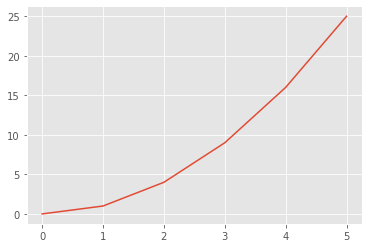

In [32]:
#загрузим библиотеку
import matplotlib.pyplot as plt #загрузить библиотеку matplotlib.pyplot под именем plt
plt.style.use('ggplot') # Мой любимый стиль графики
%matplotlib inline

#линии
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])

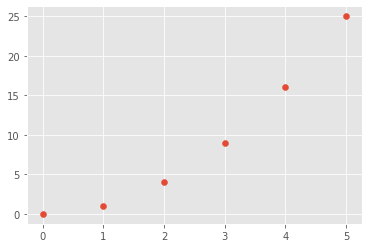

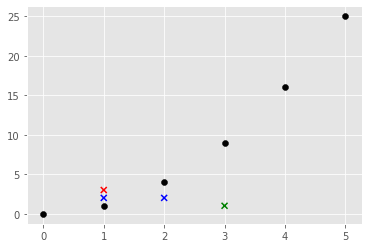

In [33]:
#точки
plt.scatter([0,1,2,3,4,5],[0,1,4,9,16,25])

plt.show()#после этой функции всё уже построенное отрисуется и начнётся новый график

#если не писать plt.show() между графиками, они накладываются
plt.scatter([1,1,2,3],[3,2,2,1],c = ["red","blue","blue","green"],marker = "x")
plt.scatter([0,1,2,3,4,5],[0,1,4,9,16,25],c = "black")

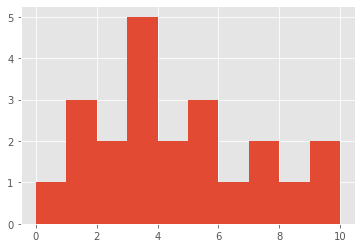

(array([4., 7., 5., 3., 3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 5 Patch objects>)

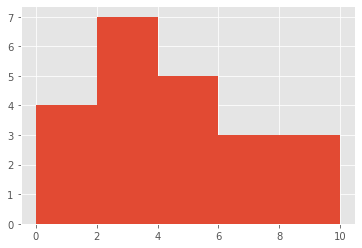

In [34]:
#гистограмма
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()

plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10],bins = 5)

In [0]:
#Построй гистограмму возрастов, гистограмму пород.

#<ваш код>

#Бонус - узнай, как строить 2D-гистограму возрастов И пород. 

# Битва с финальным боссом

При помощи интуиции, граффиков и вычислений попробуй выделить по признакам группу животных,
в которой почти все выжили. 

Признаки - выражения вида:
* [колонка] равно [значение] (пол = женский)
* [математическое выражение] >, <, >= или <=  [значение]  (возраст старше 18 дней)
* [колонка с именем] - [утверждение про имя]  (имя содержит "Mr." и длинее 5 букв)

Признаки могут использоваться через И и ИЛИ.

(и только их. НЕ, импликация, XOR, эквивалентность, штрих Шифера и стрелка Пирса идут лесом)

Например, все [старше 30 дней] И [породы Сибирский Медведь] И ([без имени] ИЛИ [с именем Попка]) - это 4 признака

При этом:
* Чем больше выживших животин(количество, а не доля), тем лучше;
* В группе обязательно должны выжить более 80% животных;
* Желательно использовать не более 5 - 10 признаков;
 * Если нашёл более 1 такой группы - перечисли несколько;
* Гипотеза должна подтверждаться запускабельным кодом, 
 * который считает число животин и шанс выжить;
 * высший пилотаж - заправить это красивыми граффиками по теме;

Напутствие - возможно, будет полезно сначала изучить данные, посмотреть на графики и обусдить идеи, а потом бросаться лихорадочно пробовать всё подряд.

In [0]:
# предварительные вычисления графики

In [0]:
#пример для [старше 30 дней] И [породы Сибирский Медведь] И ([без имени] ИЛИ [с именем Попка])

data_with_age = data[~data.AgeuponOutcome.isnull()]

age = numpy.array(list(map(age_to_days, data_with_age.AgeuponOutcome)))
age_and_breed = numpy.logical_and(age > 30, data_with_age.Breed == 'Shetland Sheepdog Mix')

# без имени ИЛИ с именем Попка
name = numpy.logical_or(data_with_age.Name.isnull(), data_with_age.Name == 'Попка')

#всё вместе
group_indexer = numpy.logical_and(age_and_breed, name)

#группа. Замените этот код на свою группу.
group = data_with_age[group_indexer]

In [0]:
print('Количество животин:', len(group))
print('Количество выживших:', len(group[(group.OutcomeType != 'Euthanasia') & (group.OutcomeType != 'Died')]))
p_survived = numpy.average((group.OutcomeType != 'Euthanasia') & (group.OutcomeType != 'Died'))
print('Вероятность выжить:', p_survived)
print('Достаточно выживших:', p_survived > 0.8)

In [0]:
# Если ещё не устал - аналогично выдели группы животин, где все погибли

[руководства по библиотекам]

  * [NumPy](http://www.numpy.org/)
    - [руководство для пользователей Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [пример работы с данными при помощи pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)